In [0]:
import keras
import numpy
from keras.datasets import cifar10

from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.models import Model
from keras.layers import Input

K.common.set_image_dim_ordering('th')
tbCallBack= keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0,write_graph=True, write_images=True)

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

visible = Input(shape=(32,32,3))
x=Conv2D(32,(3,3),padding="same",activation='relu')(visible)
x=Dropout(0.2)(x)
x=Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x=MaxPooling2D(pool_size=(2, 2))(x)
x=Dropout(0.5)(x)
x=Flatten()(x)
x=Dense(512, activation='relu', kernel_constraint=maxnorm(3))(x)
x=Dropout(0.3)(x)
x=Dense(num_classes, activation='softmax')(x)
m2 = Model(inputs=visible,output=x)


epochs = 3
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
m2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

m2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 995s 20ms/step - loss: 1.5919 - accuracy: 0.4305 - val_loss: 1.1931 - val_accuracy: 0.5729
Epoch 2/3
50000/50000 [==============================] - 979s 20ms/step - loss: 1.1585 - accuracy: 0.5910 - val_loss: 1.0468 - val_accuracy: 0.6389
Epoch 3/3
50000/50000 [==============================] - 974s 19ms/step - loss: 1.0276 - accuracy: 0.6380 - val_loss: 0.9534 - val_accuracy: 0.6724


Using TensorFlow backend.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


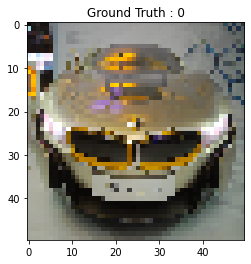

Train on 8 samples, validate on 8 samples
Epoch 1/20
8/8 [==============================] - 5s 573ms/step - loss: 0.6430 - accuracy: 0.8750 - val_loss: 2.2277 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 3s 387ms/step - loss: 5.1256 - accuracy: 0.5000 - val_loss: 6.5264 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 3s 382ms/step - loss: 22.2350 - accuracy: 0.5000 - val_loss: 0.9888 - val_accuracy: 0.5000
Epoch 4/20
8/8 [==============================] - 3s 374ms/step - loss: 5.4669 - accuracy: 0.5000 - val_loss: 0.6734 - val_accuracy: 0.7500
Epoch 5/20
8/8 [==============================] - 3s 369ms/step - loss: 0.4936 - accuracy: 0.8750 - val_loss: 0.6962 - val_accuracy: 0.5000
Epoch 6/20
8/8 [==============================] - 3s 372ms/step - loss: 0.6511 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.6250
Epoch 7/20
8/8 [==============================] - 3s 375ms/step - loss: 0.6698 - accuracy: 0.5000 - val_loss: 0.6895 

In [1]:
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img
import os
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.common.image_dim_ordering()

from google.colab import drive
drive.mount('/content/drive')

from PIL import Image
import glob
import cv2
train_images=[]
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/DL_ICP_4 FILES/Train/Cars/*.jpg'):
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal, (50,50))
    train_images.append([output,0])
from PIL import Image
import glob
import cv2
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/DL_ICP_4 FILES/Train/Plane/*.jpg'):
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal,(50,50))
    train_images.append([output,1])
import random
random.shuffle(train_images)
x_train=[]
y_train=[]
for im,label in train_images:
  x_train.append(im)
  y_train.append(label)
x_train=np.array(x_train).reshape(-1,50,50,3)
train_images[0]
type(x_train)
x_train.shape
x_train[0]
import matplotlib.pyplot as plt
plt.imshow(x_train[7,:,:])
plt.title('Ground Truth : {}'.format(y_train[7]))
plt.show()
test_images=[]
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/DL_ICP_4 FILES/Test/Cars/*.jpg'):
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal, (50,50))
    test_images.append([output,0])
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/DL_ICP_4 FILES/Test/Plane/*.jpg'):
    img_normal = cv2.imread(filename)
    #print(im.shape)
    #print(type(im.shape))
    output = cv2.resize(img_normal, (50,50))
    test_images.append([output,1])
random.shuffle(test_images)
x_test=[]
y_test=[]
for im,label in test_images:
  x_test.append(im)
  y_test.append(label)
x_test=np.array(x_test).reshape(-1,50,50,3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(x_train.shape[1:]), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
epochs = 20
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=128)
import pickle
with open("/content/drive/My Drive/Colab Notebooks/sreevalli.pk2",'wb') as file:
      pickle.dump(model,file)
x=model.predict_classes(x_train[[7],:])
print(x[0])

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import keras
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.common.set_image_dim_ordering('th')
tbCallBack= keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0,write_graph=True, write_images=True)

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(output_dim=10, activation='softmax'))

# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=256, callbacks=[tbCallBack])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
dropout_27 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 16, 16, 256)       0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 65536)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)              

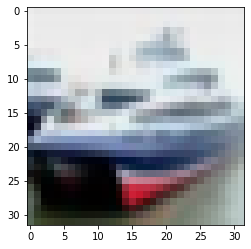

actual [8] predicted 1


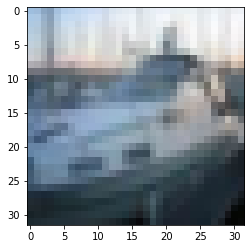

actual [8] predicted 8


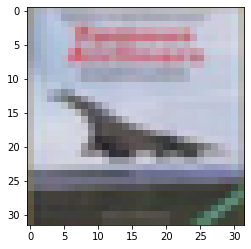

actual [0] predicted 8


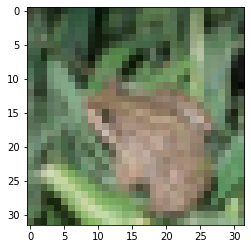

actual [6] predicted 6


In [0]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.common.image_dim_ordering()

seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
yp=y_test

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

epochs = 2
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

m1 = Sequential()
m1.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
m1.add(Dropout(0.2))
m1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
m1.add(Dropout(0.2))
m1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
m1.add(Dropout(0.2))
m1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Flatten())
m1.add(Dropout(0.2))
m1.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
m1.add(Dropout(0.2))
m1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
m1.add(Dropout(0.2))
m1.add(Dense(num_classes, activation='softmax'))
epochs = 2
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
m1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(m1.summary())
m1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)
scores = m1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

y=model.predict_classes(X_train[[1],:])
print(y[0])


import matplotlib.pyplot as plt
for i in range(1,5):
  plt.imshow(X_test[i,:,:])  
  plt.show()
  y=model.predict_classes(X_test[[i],:])
  print("actual",yp[i],"predicted",y[0])